Budowa optymalnego portfolio inwesycyjnego z zastosowaniem terorii Markovitza. 

Julia Sokół

Mikołaj Maślanka

### Podsumowanie

Korzystając z teorii **Markowitza** zostało zbudowane opttymalne portfolio skladajace sie z dziesieciu komponetow. Za pomoca ziatrna 
losowosci zostala przeprowadzona analiza symulacyja. W odwolaniu do teorii optymalizacji portfolio autorzy poszukiwali optymalnych  wag dla 10 wybranych spolek z SP500. Analiza zotala przeproeadzona dla 10 000 portfolio. 

zalozenia:
    
- przyjmuja rozklad log-normalny po zlogarytmowaniu bedzie to rozklad normalny
- stopa wolan od ryzyka - xx
- optymalny sharp = najwyzszy sharp


Chcac osiagnac max sharpa musimy 100% dostepnego kapitalu rozlokwoac pomidzy 10 spolek z odpowidnia proporcja jak ponizej:
    
            CloseMCD  CloseMA  CloseHON  CloseAMZN  CloseTSLA  CloseXOM  \
allocation      2.25    25.38     10.39      14.89      13.86      3.71   

            CloseLIN  CloseJNJ  CloseNEE  CloseNKE  
allocation      5.79      2.14     14.25      7.34 

Co wynika z przeprowadzonej analizy powyzsze wagi sa najbardziej optymalne dla zalozen.


### Opis organizacji
Firma M&S's oferuje szeroki wachlarz usług doradczych, zarówno finansowych jak i szkoleniowych. Na skorzystanie z naszej oferty najczęściej decydują się firmy nowo wchodzące na rynek,przedsiebiorstwa borykające się z problemami jak i osoby prywatne. Wskazujemy źródła problemów i szukamy ich najlepszych rozwiązań. Naszym celem jest poprawa kondycji firmy, jej rozwój i umocnienie pozycji rynkowej poprzez analizy, opracowanie najlepszych strategii i wdrażanie rozwiązań optymalizacyjnych. 

### Cel raportu
Celem przeprowadzanej analizy jest budowa optymalnego portfolio inwestycyjnego, oraz zbadanie wpływu wysokości stopy wolnej od ryzyka na to portfolio dla nowego klienta firmy. Życzeniem klienta jest inwestycja w akcje 10 przedsiębiorstw wchodzących w skład indeksu S&P 500. Na podstawie teorii Markovitza należy zbudować portfolio dla którego Wskaźnik Sharpe'a będzie najwyższy. Oznacza to, że inwestor przy określonej stopie wolnej od ryzyka uzyska największe stopy zwrotu.

IMPORT BIBLIOTEK

In [1]:
import csv
import scipy as sc
import numpy as np
from math import exp, factorial
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats.stats import kstest
plt.style.use('seaborn-whitegrid')
from datetime import datetime

**IMPORT DANYCH**

[Finansowe dane historyczne pobrano ze strony](https://finance.yahoo.com/)

In [2]:
import pandas as pd
df = pd.read_excel("portfolio1.xlsx")

In [3]:
df

,Date,OpenMZC,CloseMCD,OpenMA,CloseMA,OpenHON,CloseHON,OpenAMZN,CloseAMZN,OpenTSLA,...,OpenXOM,CloseXOM,OpenLIN,CloseLIN,OpenJNJ,CloseJNJ,OpenNEE,CloseNEE,OpenNKE,CloseNKE
0,2016-06-06,121.790001,122.000000,96.400002,96.639999,109.618431,110.152313,726.500000,726.729980,43.599998,...,88.870003,89.339996,110.580002,111.650002,114.970001,115.769997,30.520000,30.437500,53.770000,54.299999
1,2016-06-07,122.339996,121.900002,96.589996,96.680000,110.152313,109.971176,729.890015,723.739990,44.448002,...,89.750000,90.709999,111.779999,111.860001,116.010002,115.730003,30.507500,30.277500,54.160000,53.549999
2,2016-06-08,121.980003,122.110001,96.650002,97.989998,110.123711,110.657600,726.400024,726.640015,46.759998,...,91.029999,90.790001,112.239998,113.669998,115.519997,115.800003,30.242500,30.730000,53.830002,54.119999
3,2016-06-09,122.070000,122.790001,97.510002,97.019997,110.180916,111.744446,723.099976,727.650024,46.995998,...,90.180000,90.669998,113.209999,113.440002,115.779999,117.000000,30.742500,30.995001,54.110001,54.939999
4,2016-06-10,121.800003,122.360001,96.000000,95.209999,112.030457,111.239159,722.349976,717.909973,45.478001,...,90.400002,89.980003,112.949997,113.730003,116.739998,117.010002,30.980000,30.957500,54.639999,55.110001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1253,2021-05-27,233.009995,234.860001,364.549988,362.000000,226.690002,231.270004,3256.000000,3230.110107,620.239990,...,59.230000,58.560001,300.739990,300.779999,169.259995,168.809998,73.620003,73.000000,137.550003,136.559998
1254,2021-05-28,234.130005,233.889999,363.500000,360.579987,232.000000,230.910004,3242.000000,3223.070068,628.500000,...,58.730000,58.369999,302.589996,300.600006,169.520004,169.250000,73.599998,73.220001,136.240005,136.460007
1255,2021-06-01,235.979996,233.240005,364.480011,359.790009,232.889999,232.949997,3243.500000,3218.649902,627.799988,...,59.450001,60.459999,305.170013,302.260010,170.149994,165.529999,73.400002,72.120003,137.850006,134.509995
1256,2021-06-02,233.970001,233.779999,363.529999,366.850006,234.020004,230.740005,3223.100098,3233.989990,620.130005,...,60.750000,60.939999,302.309998,299.880005,165.300003,166.199997,72.080002,72.709999,134.589996,134.169998


Przygotowanie danych do dalszej analizy

In [4]:
df.columns

Index(['Date', 'OpenMZC', 'CloseMCD', 'OpenMA', 'CloseMA', 'OpenHON',
       'CloseHON', 'OpenAMZN', 'CloseAMZN', 'OpenTSLA', 'CloseTSLA', 'OpenXOM',
       'CloseXOM', 'OpenLIN', 'CloseLIN', 'OpenJNJ', 'CloseJNJ', 'OpenNEE',
       'CloseNEE', 'OpenNKE', 'CloseNKE'],
      dtype='object')

In [5]:
df1 = df.drop(columns= [ 'OpenMZC', 'OpenMA', 'OpenHON', 'OpenAMZN', 
                        'OpenTSLA' , 'OpenXOM',
                        'OpenLIN', 'OpenJNJ' , 'OpenNEE', 'OpenNKE'])

df1

,Date,CloseMCD,CloseMA,CloseHON,CloseAMZN,CloseTSLA,CloseXOM,CloseLIN,CloseJNJ,CloseNEE,CloseNKE
0,2016-06-06,122.000000,96.639999,110.152313,726.729980,44.136002,89.339996,111.650002,115.769997,30.437500,54.299999
1,2016-06-07,121.900002,96.680000,109.971176,723.739990,46.467999,90.709999,111.860001,115.730003,30.277500,53.549999
2,2016-06-08,122.110001,97.989998,110.657600,726.640015,47.104000,90.790001,113.669998,115.800003,30.730000,54.119999
3,2016-06-09,122.790001,97.019997,111.744446,727.650024,45.872002,90.669998,113.440002,117.000000,30.995001,54.939999
4,2016-06-10,122.360001,95.209999,111.239159,717.909973,43.757999,89.980003,113.730003,117.010002,30.957500,55.110001
...,...,...,...,...,...,...,...,...,...,...,...
1253,2021-05-27,234.860001,362.000000,231.270004,3230.110107,630.849976,58.560001,300.779999,168.809998,73.000000,136.559998
1254,2021-05-28,233.889999,360.579987,230.910004,3223.070068,625.219971,58.369999,300.600006,169.250000,73.220001,136.460007
1255,2021-06-01,233.240005,359.790009,232.949997,3218.649902,623.900024,60.459999,302.260010,165.529999,72.120003,134.509995
1256,2021-06-02,233.779999,366.850006,230.740005,3233.989990,605.119995,60.939999,299.880005,166.199997,72.709999,134.169998


In [6]:
# Informacje na temat dataframe
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1258 non-null   datetime64[ns]
 1   CloseMCD   1258 non-null   float64       
 2   CloseMA    1258 non-null   float64       
 3   CloseHON   1258 non-null   float64       
 4   CloseAMZN  1258 non-null   float64       
 5   CloseTSLA  1258 non-null   float64       
 6   CloseXOM   1258 non-null   float64       
 7   CloseLIN   1258 non-null   float64       
 8   CloseJNJ   1258 non-null   float64       
 9   CloseNEE   1258 non-null   float64       
 10  CloseNKE   1258 non-null   float64       
dtypes: datetime64[ns](1), float64(10)
memory usage: 108.2 KB


In [7]:
# Get column names
df1.columns

Index(['Date', 'CloseMCD', 'CloseMA', 'CloseHON', 'CloseAMZN', 'CloseTSLA',
       'CloseXOM', 'CloseLIN', 'CloseJNJ', 'CloseNEE', 'CloseNKE'],
      dtype='object')

In [8]:
# Number of rows and columns
df1.shape

(1258, 11)

In [9]:
# Summary stats of all numeric columns
df1.describe()

,CloseMCD,CloseMA,CloseHON,CloseAMZN,CloseTSLA,CloseXOM,CloseLIN,CloseJNJ,CloseNEE,CloseNKE
count,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000
mean,175.167902,218.675859,151.485991,1776.239895,158.915636,70.855970,175.990620,136.163617,49.096409,82.130262
std,33.682356,86.936456,29.966412,815.365945,207.608857,16.414849,48.252443,13.082242,15.408393,26.621898
min,110.570000,86.830002,101.384766,691.359985,35.793999,31.450001,107.010002,110.989998,28.237499,49.619999
25%,156.322506,133.810001,131.190144,993.529999,51.583499,60.477499,135.070000,127.217499,36.988750,57.745001
50%,175.625000,207.779999,147.326622,1732.290039,64.865997,77.154999,162.724998,134.885003,43.660000,79.245002
75%,206.237503,291.347504,169.029999,2004.319976,128.839996,82.287500,204.902504,144.664997,60.115625,95.462498
max,237.110001,395.649994,232.949997,3531.449951,883.090027,95.120003,302.260010,171.070007,86.870003,147.050003


In [10]:
#pierwszych 10 obserwacji
df1.head(10)

,Date,CloseMCD,CloseMA,CloseHON,CloseAMZN,CloseTSLA,CloseXOM,CloseLIN,CloseJNJ,CloseNEE,CloseNKE
0,2016-06-06,122.000000,96.639999,110.152313,726.729980,44.136002,89.339996,111.650002,115.769997,30.437500,54.299999
1,2016-06-07,121.900002,96.680000,109.971176,723.739990,46.467999,90.709999,111.860001,115.730003,30.277500,53.549999
2,2016-06-08,122.110001,97.989998,110.657600,726.640015,47.104000,90.790001,113.669998,115.800003,30.730000,54.119999
3,2016-06-09,122.790001,97.019997,111.744446,727.650024,45.872002,90.669998,113.440002,117.000000,30.995001,54.939999
4,2016-06-10,122.360001,95.209999,111.239159,717.909973,43.757999,89.980003,113.730003,117.010002,30.957500,55.110001
5,2016-06-13,122.989998,94.190002,109.761436,715.239990,43.574001,90.589996,112.879997,116.790001,30.897499,54.910000
6,2016-06-14,122.510002,94.110001,110.123711,719.299988,42.992001,90.430000,112.449997,117.120003,31.245001,54.119999
7,2016-06-15,122.250000,93.339996,110.133247,714.260010,43.540001,90.160004,112.000000,116.410004,30.959999,54.310001
8,2016-06-16,122.470001,94.080002,110.390656,717.510010,43.585999,91.220001,112.120003,116.639999,31.212500,53.470001
9,2016-06-17,122.269997,93.290001,110.514595,706.390015,43.094002,90.720001,112.099998,115.480003,31.275000,53.709999


In [11]:
#ostatnich 10 obserwaacji
df1.tail(10)

,Date,CloseMCD,CloseMA,CloseHON,CloseAMZN,CloseTSLA,CloseXOM,CloseLIN,CloseJNJ,CloseNEE,CloseNKE
1248,2021-05-20,232.179993,367.700012,222.130005,3247.679932,586.780029,58.840000,298.130005,171.070007,74.290001,133.270004
1249,2021-05-21,231.240005,367.600006,223.199997,3203.080078,580.880005,58.919998,298.570007,170.960007,74.440002,132.660004
1250,2021-05-24,231.910004,372.380005,225.000000,3244.989990,606.440002,59.610001,301.269989,170.550003,74.029999,134.059998
1251,2021-05-25,232.139999,367.220001,224.039993,3259.050049,604.690002,58.259998,301.250000,170.080002,73.370003,134.320007
1252,2021-05-26,232.350006,362.649994,224.270004,3265.159912,619.130005,58.939999,299.769989,169.070007,73.470001,136.889999
1253,2021-05-27,234.860001,362.000000,231.270004,3230.110107,630.849976,58.560001,300.779999,168.809998,73.000000,136.559998
1254,2021-05-28,233.889999,360.579987,230.910004,3223.070068,625.219971,58.369999,300.600006,169.250000,73.220001,136.460007
1255,2021-06-01,233.240005,359.790009,232.949997,3218.649902,623.900024,60.459999,302.260010,165.529999,72.120003,134.509995
1256,2021-06-02,233.779999,366.850006,230.740005,3233.989990,605.119995,60.939999,299.880005,166.199997,72.709999,134.169998
1257,2021-06-03,232.449997,361.820007,229.199997,3187.010010,572.840027,61.180000,298.320007,166.039993,72.370003,134.169998


In [12]:
#Run Summary Statistics on Individual Columns
df1[['CloseMCD', 'CloseMA', 'CloseHON', 'CloseAMZN', 'CloseTSLA',
       'CloseXOM', 'CloseLIN', 'CloseJNJ', 'CloseNEE', 'CloseNKE']].describe()

,CloseMCD,CloseMA,CloseHON,CloseAMZN,CloseTSLA,CloseXOM,CloseLIN,CloseJNJ,CloseNEE,CloseNKE
count,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000
mean,175.167902,218.675859,151.485991,1776.239895,158.915636,70.855970,175.990620,136.163617,49.096409,82.130262
std,33.682356,86.936456,29.966412,815.365945,207.608857,16.414849,48.252443,13.082242,15.408393,26.621898
min,110.570000,86.830002,101.384766,691.359985,35.793999,31.450001,107.010002,110.989998,28.237499,49.619999
25%,156.322506,133.810001,131.190144,993.529999,51.583499,60.477499,135.070000,127.217499,36.988750,57.745001
50%,175.625000,207.779999,147.326622,1732.290039,64.865997,77.154999,162.724998,134.885003,43.660000,79.245002
75%,206.237503,291.347504,169.029999,2004.319976,128.839996,82.287500,204.902504,144.664997,60.115625,95.462498
max,237.110001,395.649994,232.949997,3531.449951,883.090027,95.120003,302.260010,171.070007,86.870003,147.050003


### Wyliczono proste stopy zwrotu 

In [13]:
# zmieniono indeksowanie na Date

df2 = df1.set_index('Date')

df2


,CloseMCD,CloseMA,CloseHON,CloseAMZN,CloseTSLA,CloseXOM,CloseLIN,CloseJNJ,CloseNEE,CloseNKE
Date,,,,,,,,,,
2016-06-06,122.000000,96.639999,110.152313,726.729980,44.136002,89.339996,111.650002,115.769997,30.437500,54.299999
2016-06-07,121.900002,96.680000,109.971176,723.739990,46.467999,90.709999,111.860001,115.730003,30.277500,53.549999
2016-06-08,122.110001,97.989998,110.657600,726.640015,47.104000,90.790001,113.669998,115.800003,30.730000,54.119999
2016-06-09,122.790001,97.019997,111.744446,727.650024,45.872002,90.669998,113.440002,117.000000,30.995001,54.939999
2016-06-10,122.360001,95.209999,111.239159,717.909973,43.757999,89.980003,113.730003,117.010002,30.957500,55.110001
...,...,...,...,...,...,...,...,...,...,...
2021-05-27,234.860001,362.000000,231.270004,3230.110107,630.849976,58.560001,300.779999,168.809998,73.000000,136.559998
2021-05-28,233.889999,360.579987,230.910004,3223.070068,625.219971,58.369999,300.600006,169.250000,73.220001,136.460007
2021-06-01,233.240005,359.790009,232.949997,3218.649902,623.900024,60.459999,302.260010,165.529999,72.120003,134.509995


In [14]:
df4 = df2.pct_change()
df4

,CloseMCD,CloseMA,CloseHON,CloseAMZN,CloseTSLA,CloseXOM,CloseLIN,CloseJNJ,CloseNEE,CloseNKE
Date,,,,,,,,,,
2016-06-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-06-07,-0.000820,0.000414,-0.001644,-0.004114,0.052837,0.015335,0.001881,-0.000345,-0.005257,-0.013812
2016-06-08,0.001723,0.013550,0.006242,0.004007,0.013687,0.000882,0.016181,0.000605,0.014945,0.010644
2016-06-09,0.005569,-0.009899,0.009822,0.001390,-0.026155,-0.001322,-0.002023,0.010363,0.008624,0.015152
2016-06-10,-0.003502,-0.018656,-0.004522,-0.013386,-0.046085,-0.007610,0.002556,0.000085,-0.001210,0.003094
...,...,...,...,...,...,...,...,...,...,...
2021-05-27,0.010803,-0.001792,0.031212,-0.010734,0.018930,-0.006447,0.003369,-0.001538,-0.006397,-0.002411
2021-05-28,-0.004130,-0.003923,-0.001557,-0.002180,-0.008924,-0.003245,-0.000598,0.002606,0.003014,-0.000732
2021-06-01,-0.002779,-0.002191,0.008835,-0.001371,-0.002111,0.035806,0.005522,-0.021979,-0.015023,-0.014290


### Stworzono tablicę kowariancji 

In [15]:
cov_matrix_annual = df4.cov() * 252

cov_matrix_annual

,CloseMCD,CloseMA,CloseHON,CloseAMZN,CloseTSLA,CloseXOM,CloseLIN,CloseJNJ,CloseNEE,CloseNKE
CloseMCD,0.053631,0.037626,0.033165,0.019506,0.040189,0.029557,0.028643,0.019233,0.027802,0.032215
CloseMA,0.037626,0.087394,0.050389,0.046014,0.063108,0.047012,0.045941,0.027436,0.030212,0.046472
CloseHON,0.033165,0.050389,0.063509,0.022410,0.040995,0.048089,0.040939,0.024828,0.026002,0.040994
CloseAMZN,0.019506,0.046014,0.022410,0.084807,0.066504,0.019896,0.026005,0.017237,0.017778,0.029502
CloseTSLA,0.040189,0.063108,0.040995,0.066504,0.352706,0.036503,0.042001,0.017769,0.030984,0.049632
CloseXOM,0.029557,0.047012,0.048089,0.019896,0.036503,0.088141,0.037959,0.023096,0.022585,0.036321
CloseLIN,0.028643,0.045941,0.040939,0.026005,0.042001,0.037959,0.061593,0.024472,0.026387,0.034618
CloseJNJ,0.019233,0.027436,0.024828,0.017237,0.017769,0.023096,0.024472,0.039956,0.022784,0.022430
CloseNEE,0.027802,0.030212,0.026002,0.017778,0.030984,0.022585,0.026387,0.022784,0.057789,0.026412
CloseNKE,0.032215,0.046472,0.040994,0.029502,0.049632,0.036321,0.034618,0.022430,0.026412,0.079601


In [16]:
df4.columns

Index(['CloseMCD', 'CloseMA', 'CloseHON', 'CloseAMZN', 'CloseTSLA', 'CloseXOM',
       'CloseLIN', 'CloseJNJ', 'CloseNEE', 'CloseNKE'],
      dtype='object')

In [17]:
df4.shape

(1258, 10)

### Wizualizacja historycznych cen zamknięcia i stóp zwrotu 10 spółek wchodzących w skład analizowanego portfela

In [18]:
import datetime as dt
import matplotlib.pyplot as plt
plt.style.use('seaborn-colorblind')  
%matplotlib inline

Text(0, 0.5, 'price ($)')

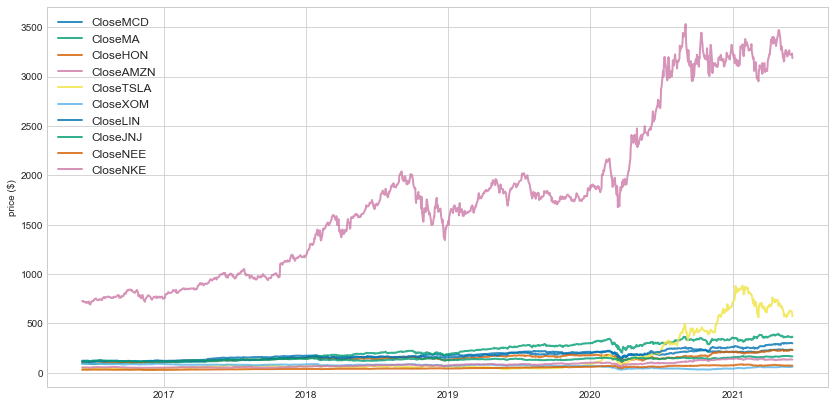

In [19]:
plt.figure(figsize=(14, 7))
for i in df2.columns.values:
    plt.plot(df2.index, df2[i], lw=2, alpha=0.8,label=i)
plt.legend(loc='upper left', fontsize=12)
plt.ylabel('price ($)')

Rys.1 Ceny zamknięcia wszystkich 10 spółek wchodzących w skład analizowanego portfela (2016-2021)

Jako, że ceny zamknięcia dla spółki Amazon znacząco odbiegają od reszty, postanowiono wykonać kolejny (bardziej czytelny) wykres z pominięciem CloseAMZN. 

In [20]:
df6 = df2.drop(columns= ['CloseAMZN'])

df6

,CloseMCD,CloseMA,CloseHON,CloseTSLA,CloseXOM,CloseLIN,CloseJNJ,CloseNEE,CloseNKE
Date,,,,,,,,,
2016-06-06,122.000000,96.639999,110.152313,44.136002,89.339996,111.650002,115.769997,30.437500,54.299999
2016-06-07,121.900002,96.680000,109.971176,46.467999,90.709999,111.860001,115.730003,30.277500,53.549999
2016-06-08,122.110001,97.989998,110.657600,47.104000,90.790001,113.669998,115.800003,30.730000,54.119999
2016-06-09,122.790001,97.019997,111.744446,45.872002,90.669998,113.440002,117.000000,30.995001,54.939999
2016-06-10,122.360001,95.209999,111.239159,43.757999,89.980003,113.730003,117.010002,30.957500,55.110001
...,...,...,...,...,...,...,...,...,...
2021-05-27,234.860001,362.000000,231.270004,630.849976,58.560001,300.779999,168.809998,73.000000,136.559998
2021-05-28,233.889999,360.579987,230.910004,625.219971,58.369999,300.600006,169.250000,73.220001,136.460007
2021-06-01,233.240005,359.790009,232.949997,623.900024,60.459999,302.260010,165.529999,72.120003,134.509995


Text(0, 0.5, 'price ($)')

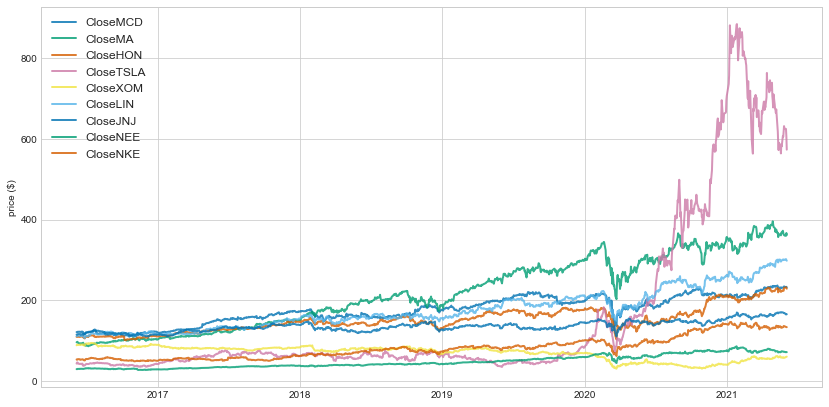

In [21]:
plt.figure(figsize=(14, 7))
for i in df6.columns.values:
    plt.plot(df6.index, df6[i], lw=2, alpha=0.8,label=i)
plt.legend(loc='upper left', fontsize=12)
plt.ylabel('price ($)')

Rys.2 Ceny zamknięcia spółek wchodzących w skład analizowanego portfela z pominięciem spółki Amazon (2016-2021)

In [22]:
df4

,CloseMCD,CloseMA,CloseHON,CloseAMZN,CloseTSLA,CloseXOM,CloseLIN,CloseJNJ,CloseNEE,CloseNKE
Date,,,,,,,,,,
2016-06-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-06-07,-0.000820,0.000414,-0.001644,-0.004114,0.052837,0.015335,0.001881,-0.000345,-0.005257,-0.013812
2016-06-08,0.001723,0.013550,0.006242,0.004007,0.013687,0.000882,0.016181,0.000605,0.014945,0.010644
2016-06-09,0.005569,-0.009899,0.009822,0.001390,-0.026155,-0.001322,-0.002023,0.010363,0.008624,0.015152
2016-06-10,-0.003502,-0.018656,-0.004522,-0.013386,-0.046085,-0.007610,0.002556,0.000085,-0.001210,0.003094
...,...,...,...,...,...,...,...,...,...,...
2021-05-27,0.010803,-0.001792,0.031212,-0.010734,0.018930,-0.006447,0.003369,-0.001538,-0.006397,-0.002411
2021-05-28,-0.004130,-0.003923,-0.001557,-0.002180,-0.008924,-0.003245,-0.000598,0.002606,0.003014,-0.000732
2021-06-01,-0.002779,-0.002191,0.008835,-0.001371,-0.002111,0.035806,0.005522,-0.021979,-0.015023,-0.014290


Text(0, 0.5, 'daily returns')

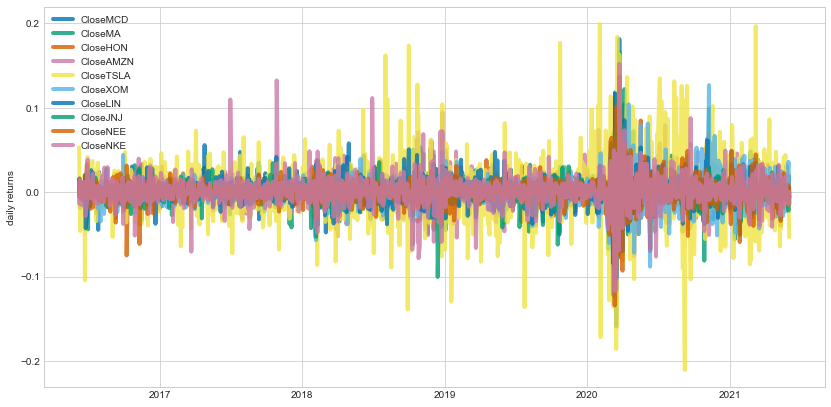

In [23]:
plt.figure(figsize=(14, 7))
for i in df4.columns.values:
    plt.plot(df4.index, df4[i], lw=4, alpha=0.8,label=i)
plt.legend(loc='upper left', fontsize=10)
plt.ylabel('daily returns')

Rys.3 Proste stopy zwrotu wszystkich 10 spółek wchodzących w skład analizowanego portfela (2016-2021)

### Definiowanie funkcji do symulacji losowych portfeli

Utworzono funkcję do obliczania zmienności oraz zwrotu z inwestycji

In [24]:

def portfolio_annualized_performance (weights1, mean_df4, cov_matrix1):
    
    # Biorąc pod uwagę średnie stopy zwrotu, oblicz wagi akcji. zwrot portfela
    
    df4 = np.sum(mean_df4 * weights1 ) * 252
    
    # Odchylenie standardowe portfela (przy użyciu iloczynu skalarnego wobec kowariancji, wag)
    
    # 252 dni handlowych
    
    std1 = np.sqrt(np.dot(weights1.T, np.dot(cov_matrix1, weights1))) * np.sqrt(252)
    
    return std1, df4


### Następnie stworzono funkcję generującą losowe portfele z losowymi wagami przypisanymi do każdej spółki:

Ustawiono ziarno losowośći aby po znalezieniu optymalnego rozwiązania móc przeprowadzać dalsze analziy na tych samych losowo wygenerowanych danych.

In [25]:
def generate_random_portfolios (num_portfolios1, mean_df4, cov_matrix1, risk_free_rate, seed = 1):
    
    # tablica  3 x N, aby przechowywać  wyniki,
    
    # gdzie N to liczba portfolio, kótre będziemy symulować

    np.random.seed(1)
 
    
    results = np.zeros((3,num_portfolios1))
    
    # Tablica do przechowywania wag
    
    weight_array = []
    
    for i in range(num_portfolios1):
        
        # Losowo przypisz wagi do naszych 10 spółek
        
        weights1 = np.random.random(10)
        
        # Zamień losowe liczby zmiennoprzecinkowe na wartości procentowe (sumując do 100)
        
        weights1 /= np.sum(weights1)
        
        # Dodaj do tablicy z wagami
        
        weight_array.append(weights1)
        
        # odchylenie standardowe i zwroty z naszej funkcji,
        # średnie zwroty wygenerowane w tej funkcji
        
        portfolio_std_dev, portfolio_return = portfolio_annualized_performance(weights1, mean_df4, cov_matrix1)
        
        # Przechowaj wyniki
        
        results[0,i] = portfolio_std_dev
        
        results[1,i] = portfolio_return
        
        # Sharpe ratio
        
        results[2,i] = (portfolio_return - risk_free_rate) / portfolio_std_dev
        
    return results, weight_array

### Następnie ustalono ostateczne zmienne wejściowe, obliczając średnie stopy zwrotu z każdej akcji i macierz kowariancji, która zostanie użyta do obliczeniach ryzyka

In [26]:
mean_df4 = df4.mean()

cov_matrix1 = df4.cov()

# Liczba symulowanych portfolio

num_portfolios1 = 10000

#Stopa wolna od ryzyka

risk_free_rate = 0.05


### Symulacja zwrotów/wariancji portfela, wizualizacja efektywnej granicy

----------------------------------------------------------------------------------------------------
Portfolio at maximum Sharpe Ratio

--Returns, volatility--

Annualized Return: 0.35
Annualized Volatility: 0.25


--Allocation at max Sharpe ratio--

            CloseMCD  CloseMA  CloseHON  CloseAMZN  CloseTSLA  CloseXOM  \
allocation      8.54     4.21      5.23      25.01      26.33      0.31   

            CloseLIN  CloseJNJ  CloseNEE  CloseNKE  
allocation      3.85     11.65     14.38       0.5  
----------------------------------------------------------------------------------------------------


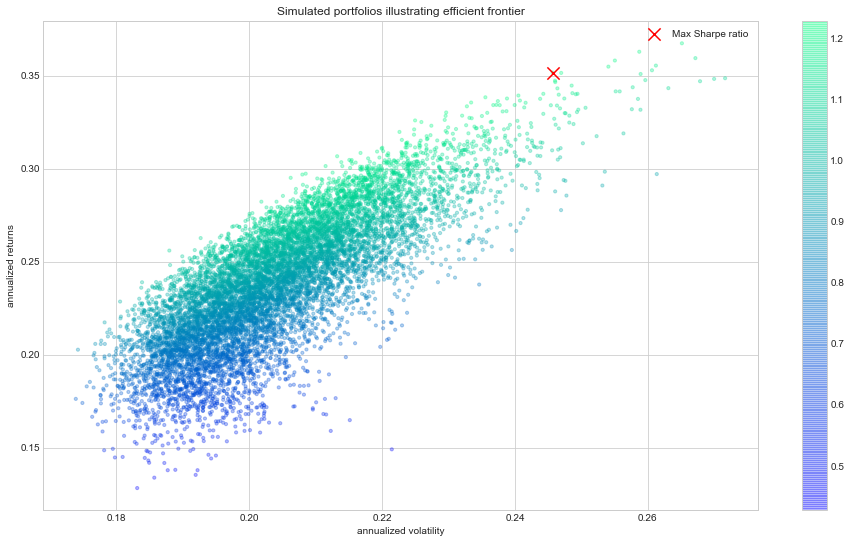

In [27]:
def display_simulated_portfolios(mean_df4, cov_matrix1, num_portfolios1, risk_free_rate):

    # wyniki i wagi z losowych portfeli
    
    results, weights1 = generate_random_portfolios(num_portfolios1,mean_df4, cov_matrix1, risk_free_rate)
    
    # max portfolio Sharpe ratio 
    
    max_sharpe_idx = np.argmax(results[2])

    
    stdev_portfolio, returns_portfolio = results[0,max_sharpe_idx], results[1,max_sharpe_idx]

    # alokacja związana z maksymalnym współczynnikiem Sharpe'a
    
    max_sharpe_allocation = pd.DataFrame(weights1[max_sharpe_idx],index=df2.columns,columns=['allocation'])
    
    max_sharpe_allocation.allocation = [round(i*100,2)for i in max_sharpe_allocation.allocation]
    
    max_sharpe_allocation = max_sharpe_allocation.T
    
    print("-"*100)
    print("Portfolio at maximum Sharpe Ratio\n")
    print("--Returns, volatility--\n")
    print("Annualized Return:", round(returns_portfolio,2))
    print("Annualized Volatility:", round(stdev_portfolio,2))
    
    print("\n")
    print("--Allocation at max Sharpe ratio--\n")
    print(max_sharpe_allocation)
    print("-"*100)
    
    plt.figure(figsize=(16, 9))
    # x = volatility, y = annualized return, color mapping = sharpe ratio
    
    plt.scatter(results[0,:],results[1,:],c=results[2,:], cmap='winter', marker='o', s=10, alpha=0.3)
    plt.colorbar()
    
    # Zaznacz punkt na wykresie
    
    plt.scatter(stdev_portfolio, returns_portfolio, marker='x',color='r',s=150, label='Max Sharpe ratio')
    plt.title('Simulated portfolios illustrating efficient frontier')
    plt.xlabel('annualized volatility')
    plt.ylabel('annualized returns')
    plt.legend(labelspacing=1.2)

display_simulated_portfolios(mean_df4, cov_matrix1, num_portfolios1, risk_free_rate)


Rys.4 Pocisk Markowitza - wizualizacja teorri portfelowej dla powyższego modelu symulacyjnego

### Analiza wrażliwości 
#### Jak stopa wolna od ryzyka wplywa na rozwiązanie optymalne

Wprowadzono funkcję, kóra losuje randomową wartość stopy wolnej od ryzyka z przedziału 0.001, 0.05
Następnie kilkukrotnie przeprowadzono symulację, aby zbadać jak wysokość tej stopy wpływa na wygląd analizowanego, optymalnego portfela inwestycyjnego. 

In [28]:
mean_df4 = df4.mean()

cov_matrix1 = df4.cov()

In [29]:
def generate_random_portfolios (num_portfolios1, mean_df4, cov_matrix1, risk_free_rate, seed = 1):
    
 
    np.random.seed(1)
    
    results = np.zeros((3,num_portfolios1))
    
    weight_array = []
    
    for i in range(num_portfolios1):
        
        
        weights1 = np.random.random(10)
        
    
        weights1 /= np.sum(weights1)
        
        
        weight_array.append(weights1)
        
        
        portfolio_std_dev, portfolio_return = portfolio_annualized_performance(weights1, mean_df4, cov_matrix1)
        
        
        results[0,i] = portfolio_std_dev
        
        results[1,i] = portfolio_return
        
        results[2,i] = (portfolio_return - risk_free_rate) / portfolio_std_dev
        
    return results, weight_array

## Stopa wolna od ryzyka jest ustlana manualnie

In [72]:
#import random
#mean_df4 = df4.mean()
#cov_matrix1 = df4.cov()
#num_portfolios1 = 10000
#risk_free_rate = random.uniform(0.001, 0.05)
#print(risk_free_rate)
risk_free_rate = 0.18

----------------------------------------------------------------------------------------------------
Portfolio at maximum Sharpe Ratio

--Returns, volatility--

Annualized Return: 0.37
Annualized Volatility: 0.27


--Allocation at max Sharpe ratio--

            CloseMCD  CloseMA  CloseHON  CloseAMZN  CloseTSLA  CloseXOM  \
allocation      5.85    13.28       0.1      13.24      29.52       1.9   

            CloseLIN  CloseJNJ  CloseNEE  CloseNKE  
allocation     12.88      8.77      1.22     13.24  
----------------------------------------------------------------------------------------------------


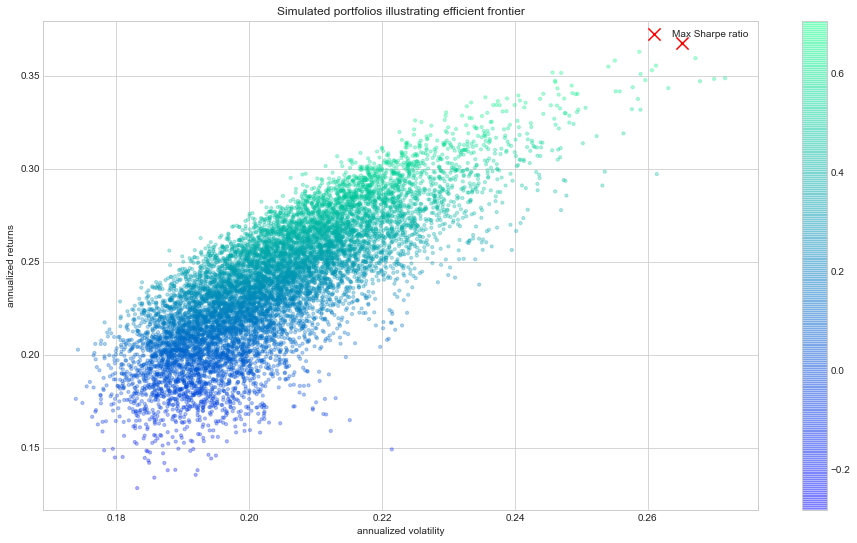

In [73]:
def display_simulated_portfolios(mean_df4, cov_matrix1, num_portfolios1, risk_free_rate):
    results, weights1 = generate_random_portfolios(num_portfolios1,mean_df4, cov_matrix1, risk_free_rate)  
    max_sharpe_idx = np.argmax(results[2])
    stdev_portfolio, returns_portfolio = results[0,max_sharpe_idx], results[1,max_sharpe_idx]
    max_sharpe_allocation = pd.DataFrame(weights1[max_sharpe_idx],index=df4.columns,columns=['allocation'])
    max_sharpe_allocation.allocation = [round(i*100,2)for i in max_sharpe_allocation.allocation]
    max_sharpe_allocation = max_sharpe_allocation.T
    print("-"*100)
    print("Portfolio at maximum Sharpe Ratio\n")
    print("--Returns, volatility--\n")
    print("Annualized Return:", round(returns_portfolio,2))
    print("Annualized Volatility:", round(stdev_portfolio,2))
    print("\n")
    print("--Allocation at max Sharpe ratio--\n")
    print(max_sharpe_allocation)
    print("-"*100)
    
    plt.figure(figsize=(16, 9))
    # x = volatility, y = annualized return, color mapping = sharpe ratio
    
    plt.scatter(results[0,:],results[1,:],c=results[2,:], cmap='winter', marker='o', s=10, alpha=0.3)
    plt.colorbar()
    
    # Zaznacz punkt na wykresie
    
    plt.scatter(stdev_portfolio, returns_portfolio, marker='x',color='r',s=150, label='Max Sharpe ratio')
    plt.title('Simulated portfolios illustrating efficient frontier')
    plt.xlabel('annualized volatility')
    plt.ylabel('annualized returns')
    plt.legend(labelspacing=1.2)

display_simulated_portfolios(mean_df4, cov_matrix1, num_portfolios1, risk_free_rate)

### Wnioski i zalecenia

W zwiazku z modelem symulacyjny zostaly wyznaczone optymalne wagi dzieki ktorym inwesotr / fundusz moze osiagnac maksymalne stopy zwrotu - max sharp. Zaleca sie aby procetowy udzial spolek w portfelu nie przekraczal oszacowanych wagi. Jednak trzeba pamietac ze zastosowana teoria posiada wady a kazda inwestycja niesie za soba proadopodobienstwo utracy czesci lub calosci kapitalu. W modelu zostalo zalozone:

- stopa wolna od ryzyka - symulowane w zakresie: (0.001, 0.05) - poniewaz odpowiada to obecnej sytuacji na rynkach finansowych
- zamiana wag - odpowiada to zalozeniu modelu w odwolaniu do zminnej stopy wolnej od ryzyka

Model wyboru portfela zaproponowany przez Markowitza pomimo swej atrakcyjności, związanej z możliwością minimalizowania 
ryzyka przy niezmienionym poziomie stopy zwrotu, posiadał kilka wad. Po pierwsze, zgodnie z tym, na co kiedyś zwrócił 
uwagę John Maynard Keynes, wykorzystywanie danych z przeszłości w ekonomii może być problematyczne. Zastosowanie metody 
Makowitza wiąże się zazwyczaj z koniecznością szacowania przyszłych stóp zwrotu i odchyleń standardowych w oparciu o 
dane z przeszłości. Nie ma wszakże żadnej gwarancji, że dane z przeszłości okażą się adekwatne dla przyszłości. Po drugie, 
metoda Markowitza jest bardzo wrażliwa na niewielkie nawet zmiany warunków początkowych, czyli na wybór okresu, z którego 
pochodzą dane historyczne do analiz. Czasem wystarczy przesunąć okres analizowanych danych historycznych o kilka dni, aby w 
konsekwencji uzyskać diametralnie inny skład portfela. Sprawia to, że praktyczne zastosowanie teorii Markowitza staje się 
dosyć trudne.


### Bibliografia
1. http://moodle.szufel.pl/mod/page/view.php?id=911
2. https://pandas.pydata.org/docs/
3. https://scikit-learn.org/stable/supervised_learning.html#supervised-learning
4. https://finance.yahoo.com/
5. https://plotly.com/python/v3/ipython-notebooks/markowitz-portfolio-optimization/
6. https://mfiles.pl/pl/index.php/Teoria_Markowitza